In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read Excel file
data = pd.read_excel('/content/expense_2024.csv.xlsx')
df = pd.DataFrame(data)
df.head()

,Date,Category,Description,Amount,Payment Method,Notes
0,2024-01-05,Groceries,Tesco groceries,45.23,Debit Card,Weekly food shopping
1,2024-01-07,Rent,January rent,800.00,Credit Card,Monthly rent payment
2,2024-01-09,Transport,Uber ride,12.50,Debit Card,To office
3,2024-01-10,Entertainment,Netflix subscription,9.99,Credit Card,Monthly subscription
4,2024-01-12,Health,Pharmacy purchase,15.75,Cash,Bought vitamins


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            62 non-null     datetime64[ns]
 1   Category        62 non-null     object        
 2   Description     62 non-null     object        
 3   Amount          62 non-null     float64       
 4   Payment Method  62 non-null     object        
 5   Notes           62 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.0+ KB


In [8]:
df.shape

(62, 6)

In [15]:
# Identifying missing values and duplicates values
missing_values = df.isnull().sum()
duplicates_values = df.duplicated()
print(missing_values)
print(duplicates_values)

Date              0
Category          0
Description       0
Amount            0
Payment Method    0
Notes             0
dtype: int64
0     False
1     False
2     False
3     False
4     False
      ...  
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool


In [18]:
# Exploratory Data Analysis
Total_Expenses = df['Amount'].sum()
print('Total_Expenses of 2024 is:',Total_Expenses)

Total_Expenses of 2024 is: 5801.659999999999


Payment Method
Credit Card    3645.15
Debit Card     1832.21
Cash            324.30
Name: Amount, dtype: float64


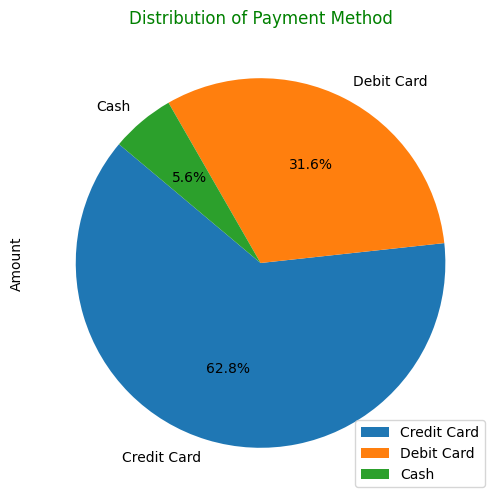

In [37]:
# Category of payment method
Payment_method_category = df.groupby('Payment Method')['Amount'].sum().sort_values(ascending=False)
print(Payment_method_category)
# Payment method disribution on pie chart.
plt.figure(figsize=(8,6))

Payment_method_category.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle = 140,
    textprops={'fontsize': 10, 'color': 'black'}
    )
plt.title('Distribution of Payment Method',color='Green')
plt.legend()
plt.show()

The pie chart illustrates that the majority of my expenses were made using a Credit Card, accounting for 62.8% of the total. This is followed by Debit Card transactions at 31.6%, and Cash payments at 5.6%.

Category
Rent             3200.00
Shopping          810.78
Groceries         528.93
Utilities         380.00
Health            272.00
Transport         262.50
Entertainment     193.45
Dining            154.00
Name: Amount, dtype: float64


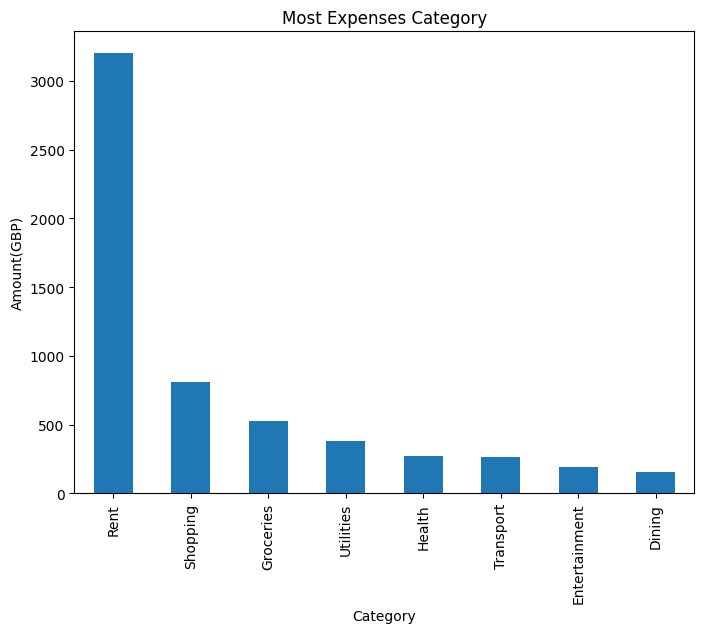

In [61]:
# top 10 category I have spent most.
top10_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).nlargest(10)
print(top10_category)
# Represent my top spent category on bar chart
colors = plt.cm.Set2(np.linspace(0, 1, len(top10_category)))
plt.figure(figsize=(8,6))
top10_category.plot(
    kind = 'bar',

)
plt.title('Most Expenses Category')
plt.xlabel("Category")
plt.ylabel('Amount(GBP)')
plt.xticks(rotation='vertical')
plt.show()

When I looked at my spending habits, the bar chart really opened my eyes. As expected, Rent takes up the biggest chunk of my expenses — over £3,000 — which isn’t surprising, but seeing it visually made the impact more real. After rent, I noticed I spent quite a bit on Shopping, around £800, which made me realize I might need to be more mindful there. Groceries came next, costing me about £550 — a necessary expense, but still something I can possibly optimize. Then came Utilities, Health, and Transport, each hovering between £200 and £400, which felt reasonable and fairly consistent with my lifestyle. What surprised me was how much less I spent on Dining and Entertainment, both under £200. Overall, this chart helped me see just how heavily weighted my expenses are toward fixed costs like rent, and where I might have room to cut back or adjust moving forward.

In [68]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
month_mapping = { 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['Month'] = df['Month'].map(month_mapping)
df.head()

,Date,Category,Description,Amount,Payment Method,Notes,Year,Month,Day
0,2024-01-05,Groceries,Tesco groceries,45.23,Debit Card,Weekly food shopping,2024,Jan,5
1,2024-01-07,Rent,January rent,800.00,Credit Card,Monthly rent payment,2024,Jan,7
2,2024-01-09,Transport,Uber ride,12.50,Debit Card,To office,2024,Jan,9
3,2024-01-10,Entertainment,Netflix subscription,9.99,Credit Card,Monthly subscription,2024,Jan,10
4,2024-01-12,Health,Pharmacy purchase,15.75,Cash,Bought vitamins,2024,Jan,12


Month
Apr     244.34
Aug     292.40
Dec     329.79
Feb     350.58
Jan     883.47
Jul     158.04
Jun     979.05
Mar     949.35
May     169.50
Nov     211.55
Oct    1004.80
Sep     228.79
Name: Amount, dtype: float64


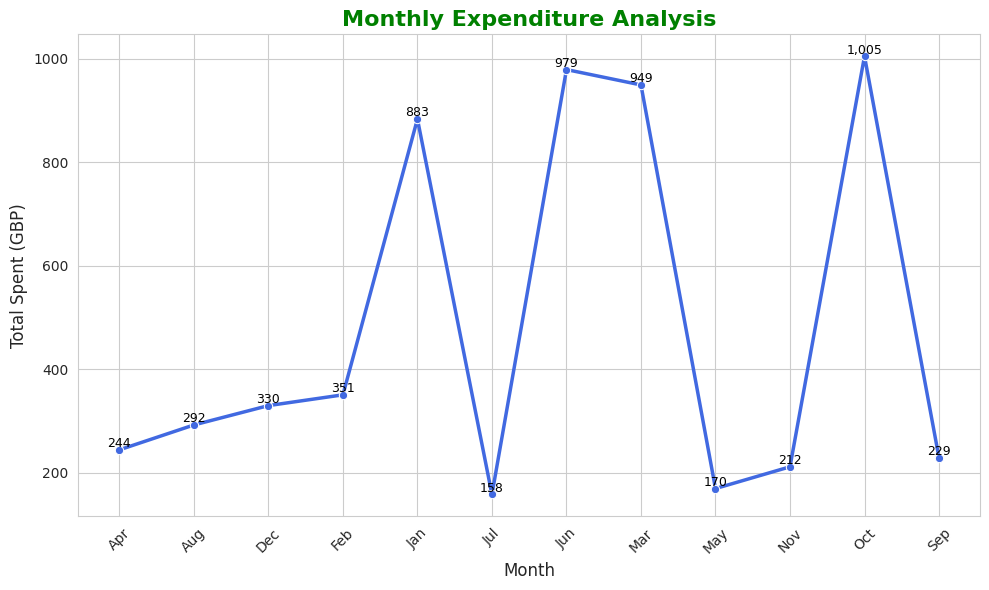

In [71]:
#Montly Expendature Analysis
monthly_expenditure = df.groupby('Month')['Amount'].sum()
print(monthly_expenditure)
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the line chart
sns.lineplot(
    x=monthly_expenditure.index,
    y=monthly_expenditure.values,
    marker='o',
    linewidth=2.5,
    color='royalblue'
)

# Title and labels
plt.title('Monthly Expenditure Analysis', fontsize=16, color='green', fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spent (GBP)', fontsize=12)

# Add data labels on each point
for x, y in zip(monthly_expenditure.index, monthly_expenditure.values):
    plt.text(x, y + 5, f'{y:,.0f}', ha='center', fontsize=9, color='black')

# Improve x-axis visibility if month names are long
plt.xticks(rotation=45)

# Tight layout
plt.tight_layout()
plt.show()

Looking back at my spending over the past year, this chart really helped me spot some interesting patterns. October stands out as the month I spent the most  over £1,000 — which likely reflects some major expenses or events during that time. June and March were also high-spending months, with totals close to £979 and £949, possibly due to seasonal costs or one-time purchases.

On the flip side, May and July were my lowest-spending months, with expenses dropping to just £170 and £158. It seems those were the times I was either very cautious with my spending or had fewer financial obligations.

Most other months, like February, December, and August, show moderate spending in the range of £292–£351, which feels like my regular lifestyle baseline.

Overall, this chart gives me a clear picture of when and how my expenses spiked — and it’s helping me think more proactively about budgeting for the months where things tend to get expensive.



Text(0, 0.5, 'Total Spent (GBP)')

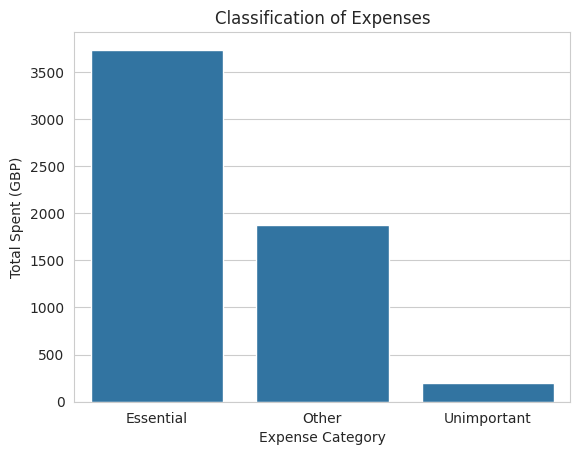

In [85]:
# Essential Expenses Vs Unimportant Expense
Essential_Expenes = {'Rent', 'Health', 'Transport', 'Dinning','Grocerries'}
Unimportant_Expenses = {'Entertainment', 'Subscription', 'Other'}
def classify_expenses(Category):
  if Category in Essential_Expenes:
   return 'Essential'
  elif Category in Unimportant_Expenses:
    return 'Unimportant'
  else:
    return 'Other'
df['Expense_Category'] = df['Category'].apply(classify_expenses)
Classification_of_Expenses = df.groupby('Expense_Category')['Amount'].sum()
sns.barplot(x=Classification_of_Expenses.index, y=Classification_of_Expenses.values)
plt.title('Classification of Expenses')
plt.xlabel('Expense Category')
plt.ylabel('Total Spent (GBP)')
plt.show()